### Loading the Libraries 

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import norm
from scipy import stats 
warnings.filterwarnings('ignore')

### Loading the Dataset

In [54]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv")

In [55]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#### Lets get to know more about the dataset

total count of rows and columns

In [56]:
print(f"number of rows: {df.shape[0]:,}\nnumber of columns: {df.shape[1]:,}")

number of rows: 550,068
number of columns: 10


Lets check for null values 

In [57]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Lets check for unique values 

In [58]:
df.nunique().sort_values(ascending= False)

Purchase                      18105
User_ID                        5891
Product_ID                     3631
Occupation                       21
Product_Category                 20
Age                               7
Stay_In_Current_City_Years        5
City_Category                     3
Gender                            2
Marital_Status                    2
dtype: int64

checking for duplicates 

In [59]:
df.duplicated().sum()

0

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


changing the type from object to category

In [61]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [62]:
cols = ['User_ID','Product_ID', 'Gender', 'Age','City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Occupation', 'Product_Category']

df[cols] = df[cols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [63]:
df.describe(include=['object', 'category']).T


,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


From the above tabel we see that.                  

frequently bought product : P00265242

Gender who shops more: male

age range of frequent shopper: 26-35

city_category: B type 

unmarried people shop more

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [65]:
df['Marital_Status'].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

Replacing Value 0, 1 in column martial status with 'Unmarried' and 'Married' respectively 

In [66]:
df['Marital_Status'].replace(0, "Umarried" , inplace= True )
df['Marital_Status'].replace(1, "Married", inplace= True )

In [67]:
df['Marital_Status'].value_counts()

Marital_Status
Umarried    324731
Married     225337
Name: count, dtype: int64

Doing the univariate analysis of the data

<Axes: xlabel='City_Category', ylabel='count'>

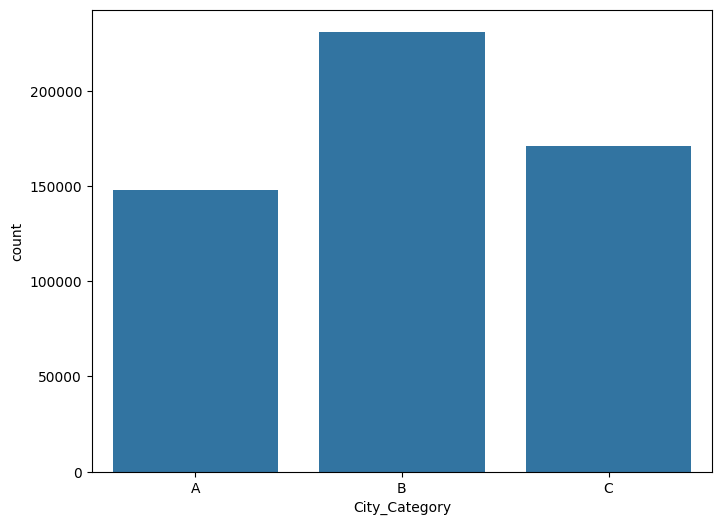

In [68]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['City_Category'])

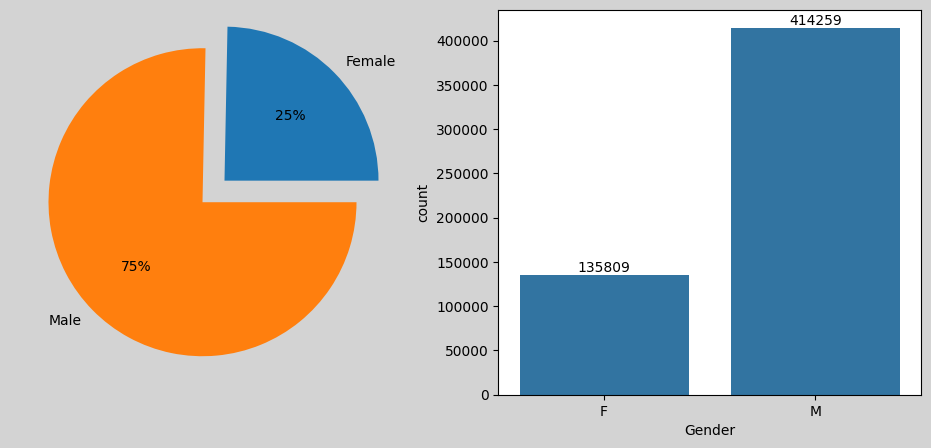

In [69]:
plt.figure(figsize= (12,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
label = ["Female", "Male"]
plt.pie(df.groupby('Gender')['Gender'].count(), labels= label, explode= (0.20,0), autopct= '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data= df, x = 'Gender')

for i in label.containers:
    label.bar_label(i)

plt.show()

In [75]:

def univariate (D, x_list: list):
    for items in x_list:

        plt.figure(figsize= (12,5)).set_facecolor("lightgrey")

        plt.subplot(1,2,1)
        label = D[items].unique().tolist()
        explode = [0.2] + [0]*(len(label)-1)
        plt.pie(D.groupby(items)[items].count(), labels= label,explode= (0.20,0),  autopct= '%0.0f%%')
        plt.title ('Elements as total percent of whole')
        plt.subplot(1,2,2)
        ax = sns.countplot(data= D, x = items)

        for i in ax.containers:
            ax.bar_label(i)

        plt.title (f'Distribution of {items} by count')
        plt.show()

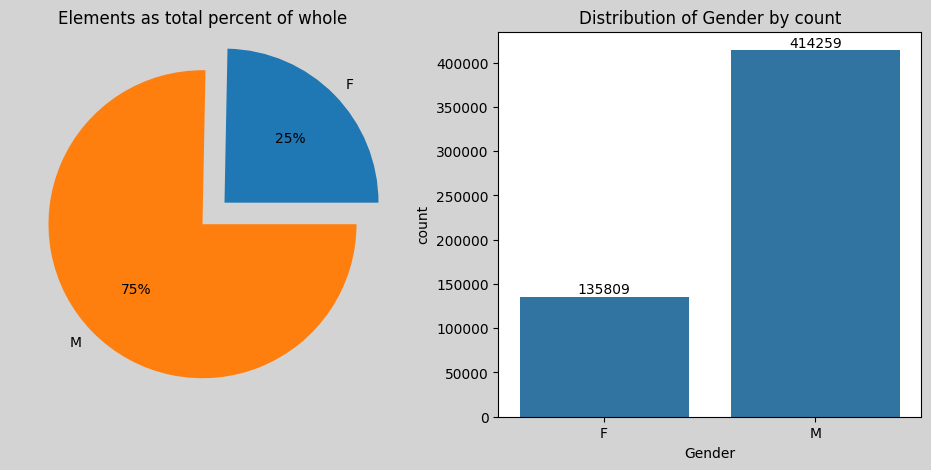

ValueError: 'explode' must be of length 'x'

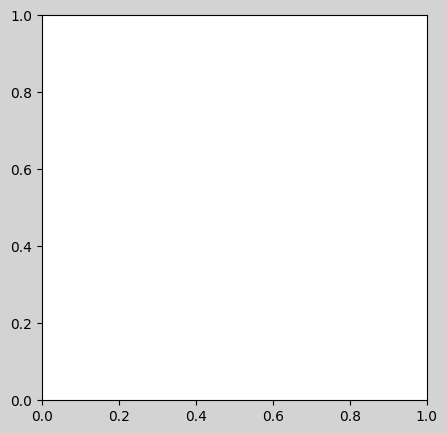

In [79]:
univariate(df,
           x_list= ['Gender','Age','City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Occupation', 'Product_Category'])

From above univariate analyis we see that 
People who purchases more items are male, people who have stayed in the city for 1 year, unmarried people and people who fall into category B

## Bi - variate analysis 

In [ ]:
def bivariate(Data, x_items: list):
    for ele in x_items:


        plt.figure(figsize= (8,5)).set_facecolor("lightgrey")
        sns.boxplot( data = Data, y = 'Purchase', x = ele, palette= 'Set3')
        plt.title(f'Purchase vs {ele}')
        plt.show()

        

Lets compare below fields with the purchase column

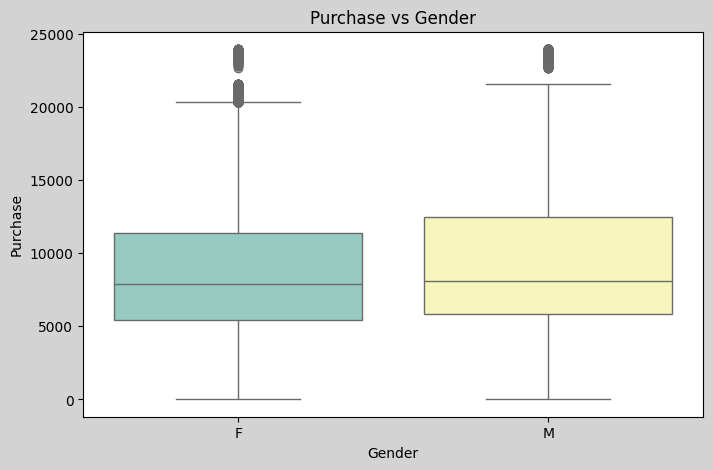

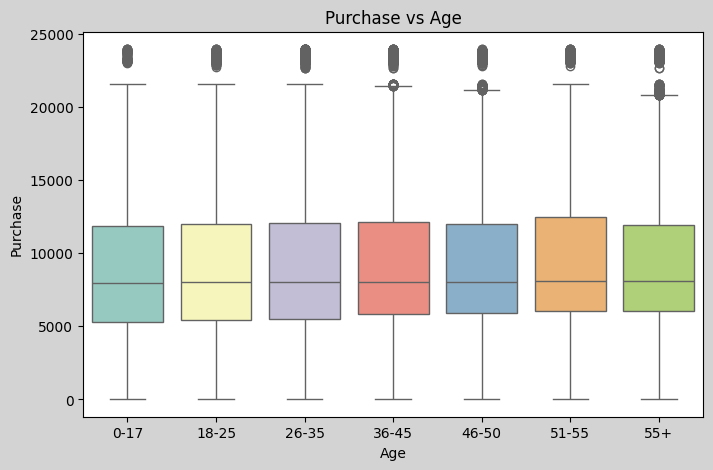

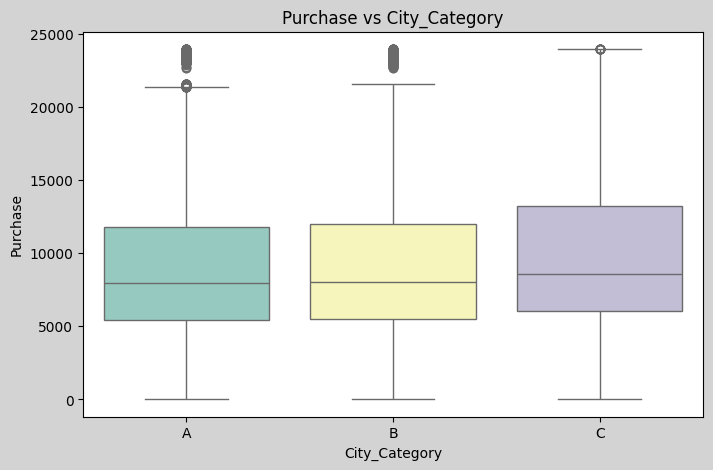

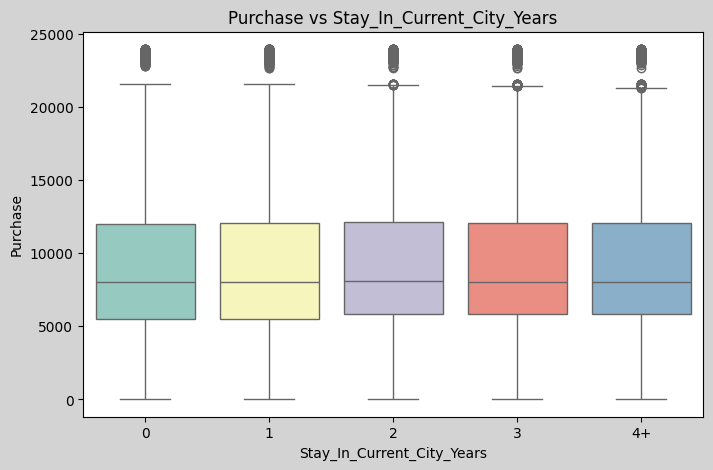

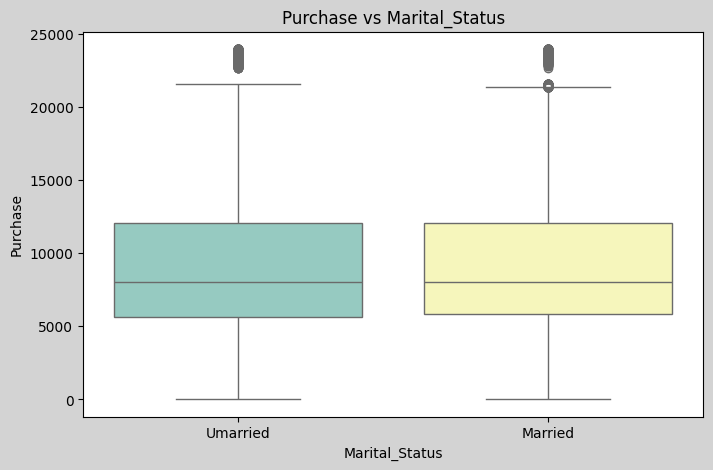

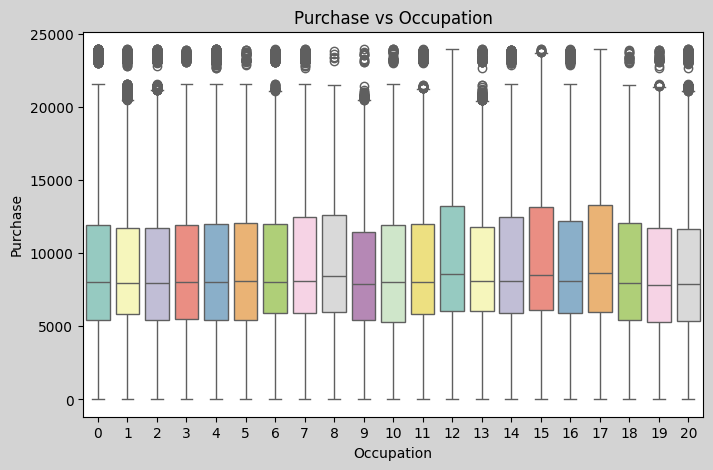

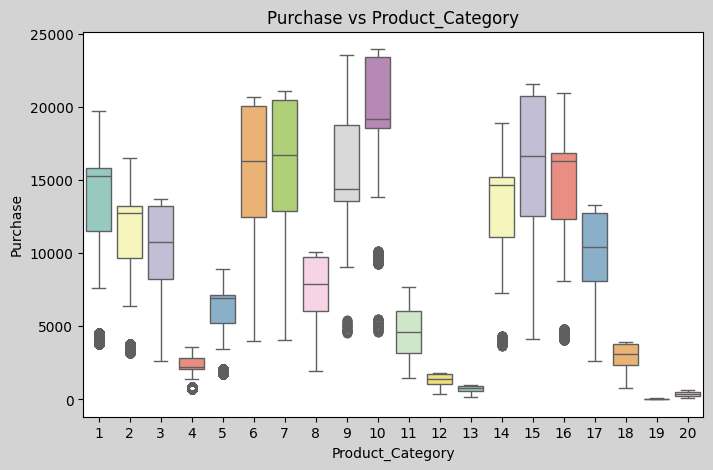

In [ ]:
bivariate(df, x_items= ['Gender', 'Age','City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Occupation', 'Product_Category'])

In [ ]:

df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


From above graph we saw that Male spent more than females. 

#### Purchase Vs Age

From the graph above we see no big differnace between the median of age groups. But let us analyse the table below 

In [ ]:
df.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


The average order value is highest for age group 51-55 which is around 9534.

While, the average amount is lowest for age group 0-17 which is arouns 8933.

The highest order value for all the groups is around 23960.

The losest order value is 12 for all the groups.                                                                                                                   


#### Purchase Vs City Category

In [ ]:
df.groupby(['City_Category'])['Purchase'].describe()


,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


From the graph we saw that C category had the max purchase

and highest mean too 
